# Table of Contents

Introduction
Problem Statement
Installing & Importing Libraries
3.1 Installing Libraries
3.2 Upgrading Libraries
3.3 Importing Libraries
Data Acquisition & Description
Data Pre-Profiling
Data Pre-Processing
Data Post-Profiling
Exploratory Data Analysis
Summarization
9.1 Conclusion
9.2 Actionable Insights



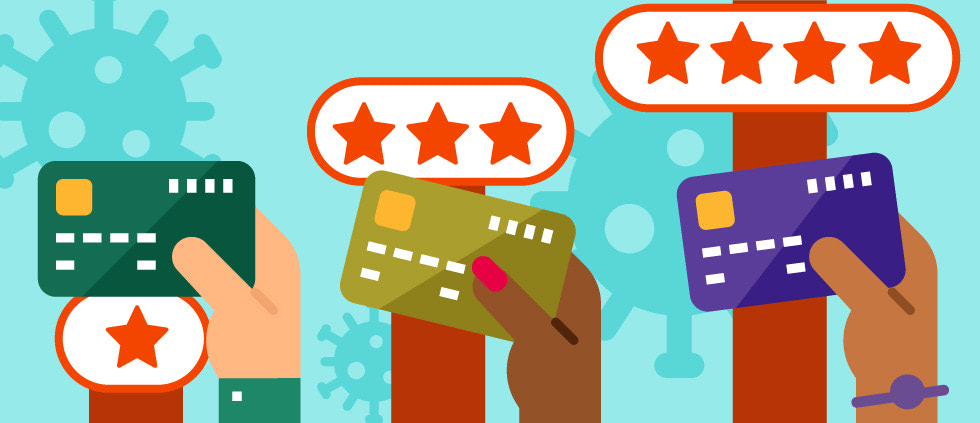

# Introduction

This data set is about credit card usage and churn on the credit card services. Credit card is unsecured funding issued to customer basis their financials viz. Salary, Income Tax Returns, Balances maintained in their accounts, also cards issued basis other bank card facie and transaction limits. 

Card issued with limit depending on the eligibility calculated basis income, age and exisiting exposure of loans and repayments. Joining fees & annual fees being charged on credit cards depending on the card type and variant.


# Problem Statement

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers. 

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.01% of customers who have churned.

# Installing & Importing Libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

import warnings
warnings.filterwarnings('ignore')

# Data Acquisition & Description

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\Hemant Kshirsagar'

In [6]:
os.chdir('C:/Users/Hemant Kshirsagar/OneDrive/Desktop/NoteBooks')

In [438]:
df_bank = pd.read_csv('BankChurners.csv')
df_bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
#Checking the shape of the data
df_bank.shape

(10127, 23)

In [9]:
#We will check and delete unncesarry colums from the data
df_bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

# Data Pre-Profiling

In [10]:
df_bank.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis =1, inplace=True )

In [11]:
#Checking the data again, as unncesarry colums have removed
df_bank.columns


Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [12]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Observation: 

There are no missing values in the database.

In [13]:
#Checking the data for having any outliers 
df_bank.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Data Pre-Processing

In [14]:
df_bank.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [15]:
#Checking for the outliers in age if any.
df_bank['Customer_Age'].value_counts()

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64

Observations:

Min age is 26 and Max is 73. Found no outliers.

We have noticed some issue in Education_Level, Marital_Status & Income_Category.
Lets check and study in details:


In [16]:
df_bank['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

As we can see by this function Marital_Status has 749 unknow values. Lets replace unknown values with mode.

In [17]:
df_bank['Marital_Status'].replace('Unknown',df_bank['Marital_Status'].mode()[0], inplace=True)

In [18]:
df_bank['Marital_Status'].value_counts()

Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [439]:
df_bank['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [20]:
df_bank['Education_Level'].replace('Unknown', df_bank['Education_Level'].mode()[0], inplace=True)

In [21]:
df_bank['Education_Level'].value_counts()

Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [22]:
df_bank['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [23]:
#As we can see Income_Category has 1112 unknow values. Lets replace unknown values with mode.
df_bank['Income_Category'].replace('Unknown', df_bank['Income_Category'].mode()[0], inplace=True)


In [24]:
df_bank['Income_Category'].value_counts()

Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [25]:
df_bank['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [26]:
df_bank['Months_on_book'].value_counts()

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: Months_on_book, dtype: int64

# Data Post-Profiling

In [27]:
#Checking the missing values if any
df_bank.isnull().any()

Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [31]:
#Checking for any duplicate values
df_bank.duplicated().value_counts()

False    10127
dtype: int64

Observation: 

Post profiling we have checked for the missing values & if any duplicates in the dataset. 

There are no missing values found
Also there are no duplicates value found

# Exploratory Data Analysis 


## Univariate Analysis

Describe a type of data which consists of observations on only a single characteristic or attribute.




### What is age density distribution

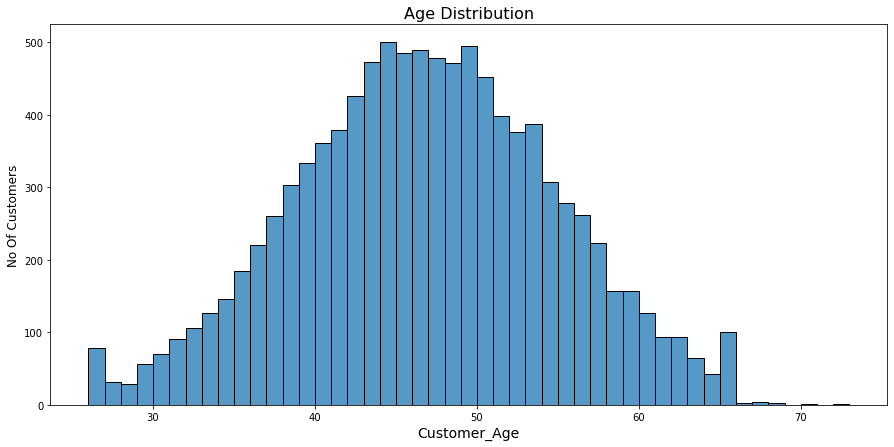

In [342]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using seaborn histplot function
sns.histplot(df_bank['Customer_Age'])

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Customer_Age', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='No Of Customers', size=12)

# Labelling title with a custom label and size of 16
plt.title(label='Age Distribution', size=16)

plt.show()

We can see that the distribution of Customer's age in our dataset follows normal distribution.

The above chart also shows that Most of the customer's age is in between 40-50.

### Feature Engineering

Looking at the above visualization of age distribution is scatterrd, for better understanding its necesarry to intrduce new feature as 'Risk Category' of the customer. 



In [33]:
 def risk_category (Customer_Age):
        
        if Customer_Age>=60:
            return ('High Risk')
        elif Customer_Age<=40:
            return ('Low Risk')
        
        else:
            return ('Moderate Risk')

In [34]:
df_bank['Risk Category'] = df_bank['Customer_Age'].apply(risk_category)

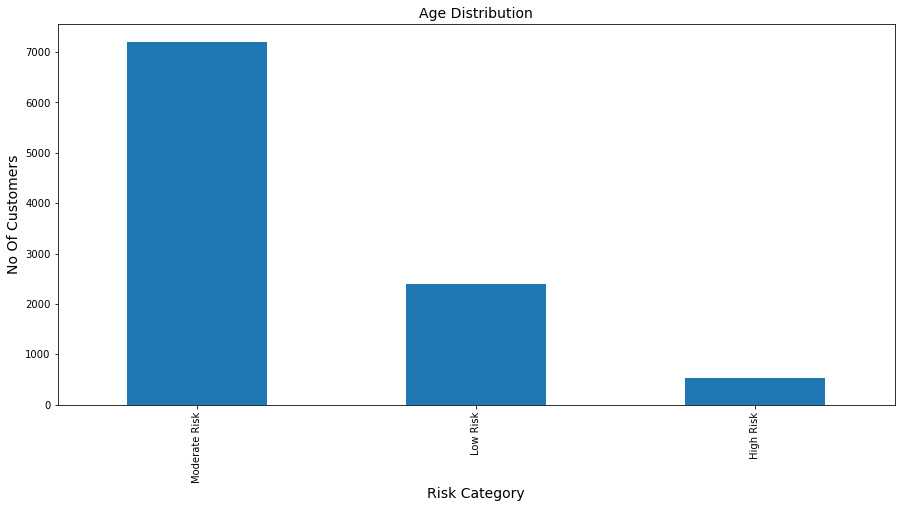

In [344]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of pandas's bar function
df_bank['Risk Category'].value_counts().plot.bar()

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Risk Category', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='No Of Customers', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Age Distribution', size=14)\

plt.show()

#### Observations:

As we have done the age categorization in 3 categories High Risk customers are more than 60 years of age.

We can see the maximum age distribution density is in between 40-50, to be considered as Moderate Risk customers.  

### Gender Distribution 

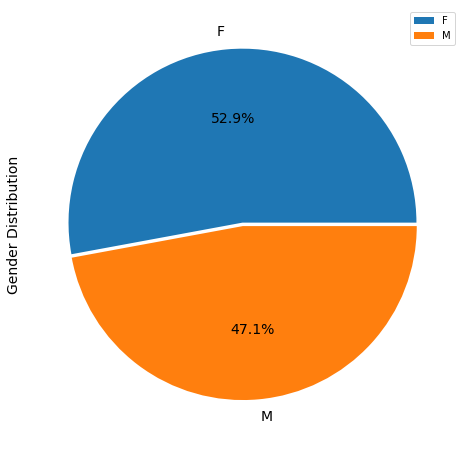

In [94]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[10, 8])

# Exploding space based on the number of categories
space = np.ones(2)/100

# Plotting Pie Chart to check the Attrition Flag
df_bank['Gender'].value_counts().plot.pie(fontsize=14, explode=space, autopct='%3.1f%%', legend=True,)

# Labeling y-axis with a custom level and size of 14
plt.ylabel(ylabel='Gender Distribution', size=14)

plt.show()


#### Observation:
As we can see in above figure that There are more number of Female customers(52.9% of data) compared to Male customers(47%) in our daatset.

### Attrition Study of Existing Customer Vs Attrited Customers

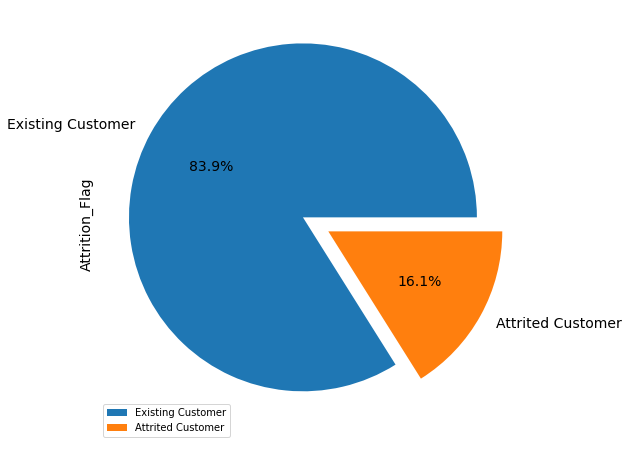

In [67]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[10, 8])

# Exploding space based on the number of categories
space = np.ones(2)/12

# Plotting Pie Chart to check the Attrition Flag
df_bank['Attrition_Flag'].value_counts().plot.pie(fontsize=14, explode=space, autopct='%3.1f%%', legend=True)

# Labeling y-axis with a custom level and size of 14
plt.ylabel(ylabel='Attrition_Flag', size=14)

plt.show()

#### Observation

16.1% Customers are Attrited. We have to help Bank with the solution to reduce this percentage.

We will see what are the critical checkpoints in further study.

### Income Range Distribution

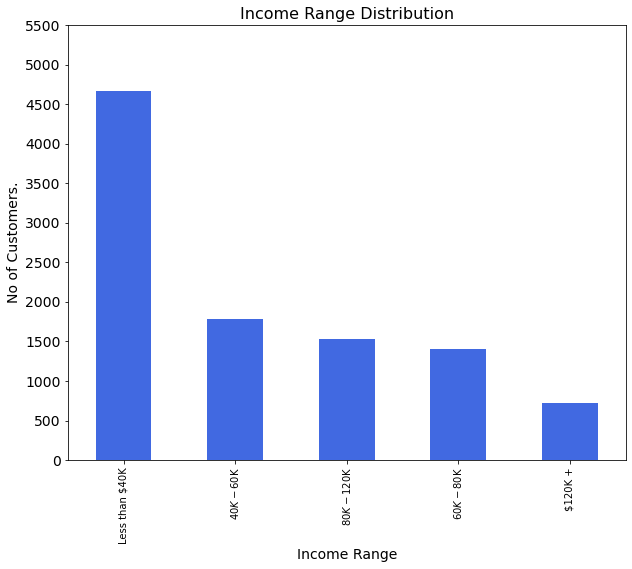

In [345]:
# Creating a custom figure size of 10 X 8 inches
figure = plt.figure(figsize=[10, 8])

# Using magic of pandas bar function
df_bank['Income_Category'].value_counts().plot.bar(color = 'Royalblue')

# Changing y-ticks value using an array of 19 value with step size of 2
plt.yticks(ticks=np.arange(0, 6000, 500), size=14)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Income Range', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='No of Customers.', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Income Range Distribution', size=16)

plt.show()

#### Observations:

We can notice the maximum customers salary range is less than $40 K.

Where as we have few in $120K+ i.e the premium customer sourcing is lacking by the bank.

### Types of Card issued by the Bank

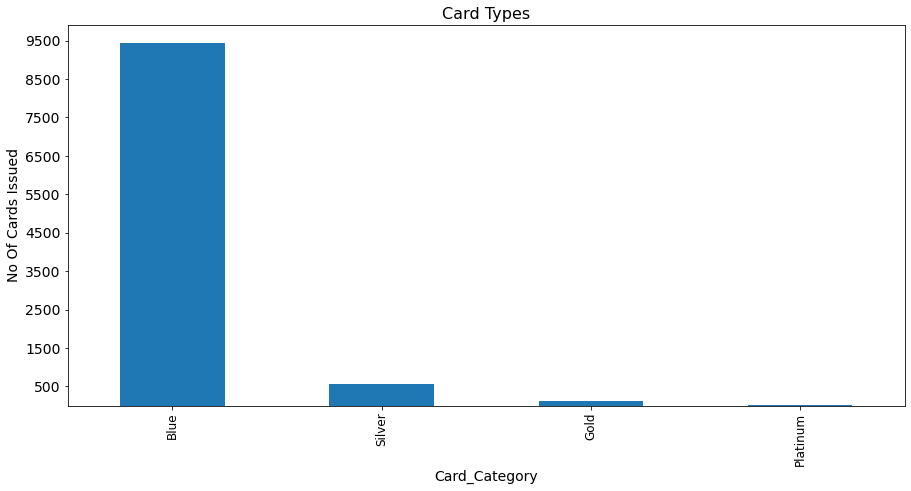

In [131]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of pandas bar function
df_bank['Card_Category'].value_counts().plot.bar() 

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Card_Category', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='No Of Cards Issued', size=14)

plt.yticks(ticks= np.arange(500,10000,1000), size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Card Types', size=16)

plt.xticks(rotation=90, size=12)

plt.show()

#### Observations:

We can see the Blue Card which has issued the most, where as Platinum & Gold cards have issued at the lowest.

It will be interesting to see which card issued as per the income category. Lets see in Bivaraite analysis. 

## Bivariate Analysis

Describe a type of data which consists of observations on two characteristics or attribute.

### Income Category wise cards issued to customers

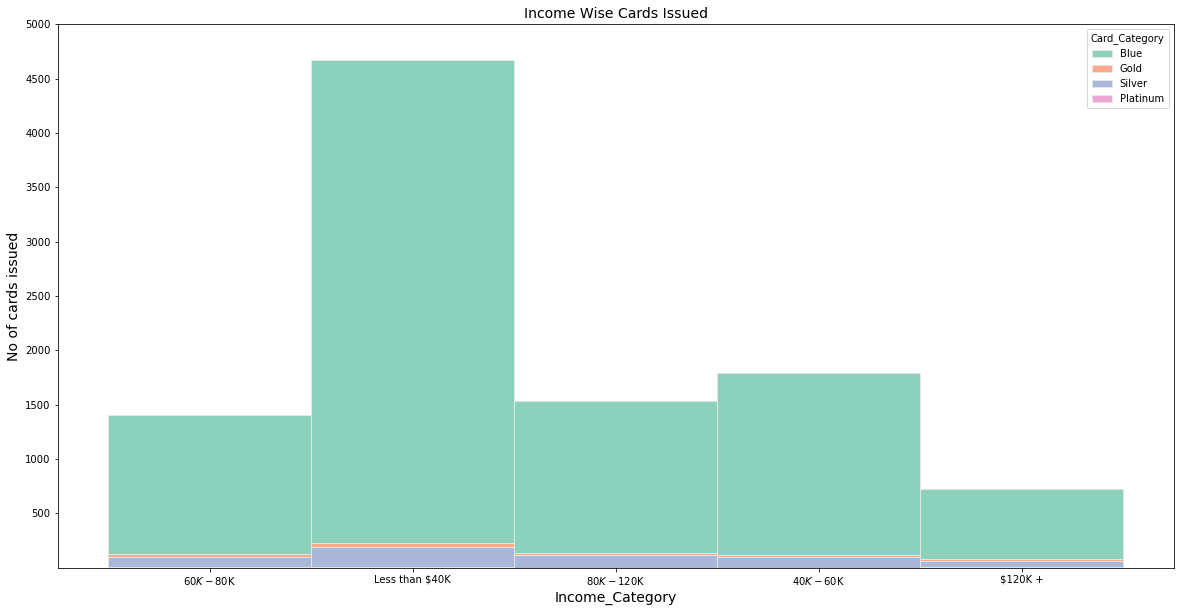

In [356]:
# As distribution ratio of some cards are at lower side hence creating a custom figure size of 20 X 10 inches for better visuals  
figure = plt.figure(figsize=[20, 10])

#Using seaborn histplot to check the distribution 
sns.histplot(df_bank,x="Income_Category", hue="Card_Category", multiple="stack", palette="Set2", edgecolor=".9",linewidth=.9)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Income_Category', size = 14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='No of cards issued', size = 14)

# Changing y-ticks ranging from 0 to 801 with step size of 50 and label size of 14
plt.yticks(ticks= np.arange(500,5500,500))

# Labelling title with a custom label and size of 14
plt.title(label='Income Wise Cards Issued', size= 14 )

plt.show()



#### Observations:

As can see the positive corelation between customer salary range and cards issued.

Maximum cards issued to customers range is less than $40K, having blue card issued on higer side followed by silver and gold.

Clearly there are wrong cards issued to premium customers (Salary rang $120k+ & $80k-120K). More Platinum could have been issued to this category customers.

Blue cards issued accross all income category, where as only 20 Platinum cards issued.

### Which card has registered the maximum spend vs limit assigned

#### Observations:

We can see the direct proprtion on limit allocated vs spend triggered on cards.

Platinum card has the highest Limit alloted which also has the highest spend registered, followed by Gold and Silver cards.

In our earlier studies we have seen Blue card issued the most however there is very less spend as compared to #of cards issued by bank.


### Card wise utilization Ratio

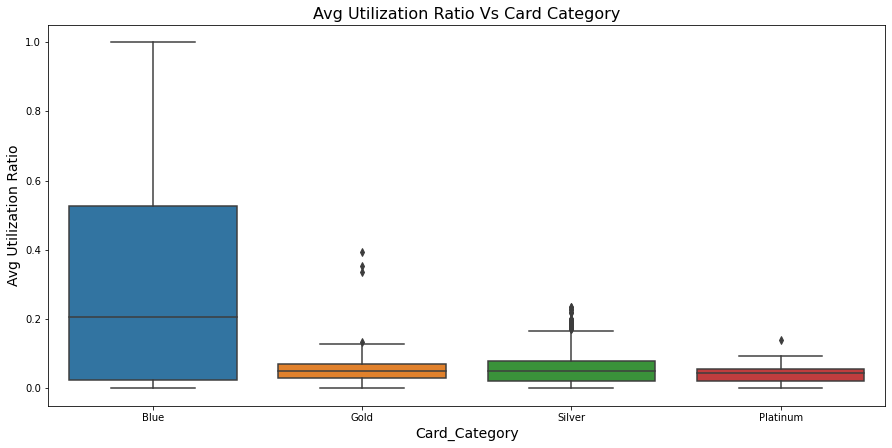

In [366]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[15, 7])

# Labelling title with a custom label and size of 16
plt.title(label='Avg Utilization Ratio Vs Card Category', size=16)

#Using boxplot to check the distribution 
sns.boxplot(x='Card_Category', y='Avg_Utilization_Ratio', data=df_bank)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Card_Category', size = 14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Avg Utilization Ratio', size = 14)

plt.show()


#### Observations:

Blue card has the highest Avg Utilization Ratio as compared to other cards.

There are some outliers noticed in Gold, Silver and Platinum cards.

### Total Txn Amount Vs Count

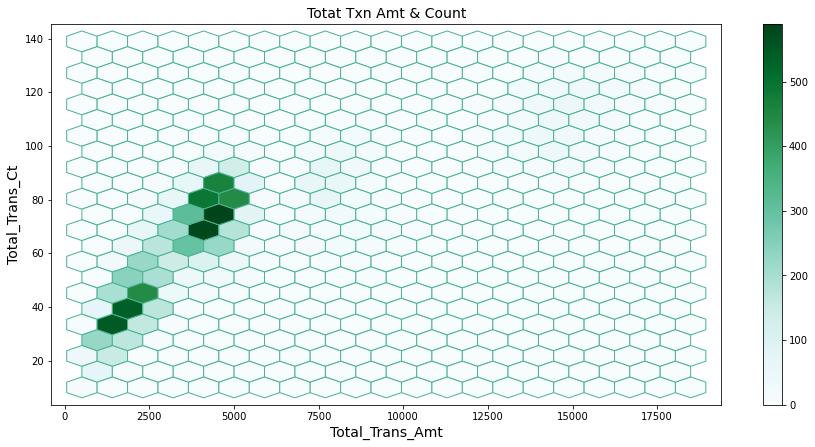

In [378]:
# Using magic of pandas hexbin() function
df_bank.plot.hexbin(x='Total_Trans_Amt', y='Total_Trans_Ct', color='#4CB391', figsize=[15, 7], gridsize=20, sharex=False)

# Labelling title with a custom label and size of 14
plt.title(label= 'Totat Txn Amt & Count', size = 14)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Total_Trans_Amt', size = 14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Total_Trans_Ct', size = 14)

plt.show()

#### Observations:

We can notice Positive correlation from above hexbin.

The higher transaction count, the higher transaction amount.

### Which Gender registered the highest Attrition Ration

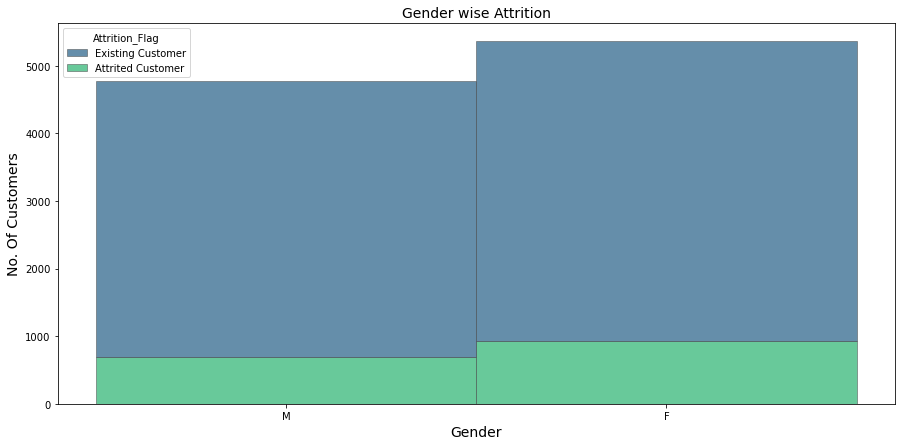

In [433]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[15,7])

#Using seaborn histplot to check the distribution
sns.histplot(df_bank,x="Gender", hue="Attrition_Flag",multiple="stack",palette="viridis",edgecolor=".3",linewidth=.5)

# Labelling title with a custom label and size of 14
plt.title(label= 'Gender wise Attrition', size = 14)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Gender', size = 14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='No. Of Customers', size = 14)

plt.show()


#### Observation:

Since Female holds the maximum cards which resulting more attrtion in this category.

### Which income_category has the highest attrited customers

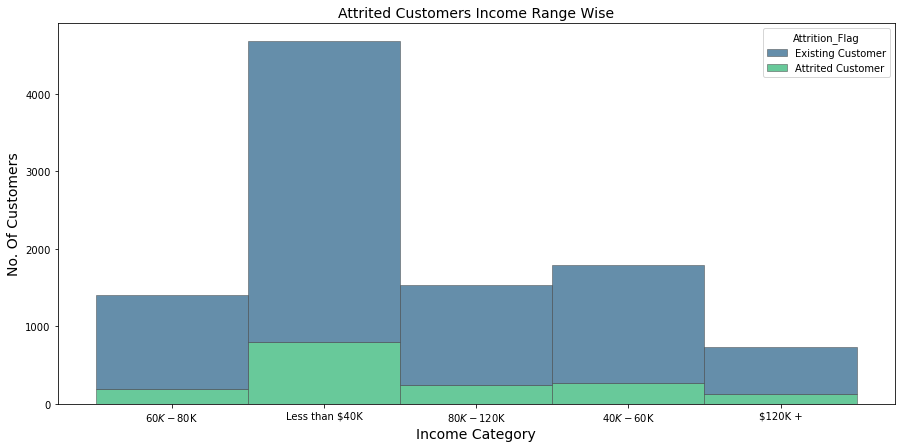

In [377]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[15,7])

#Using seaborn histplot to check the distribution
sns.histplot(df_bank,x="Income_Category", hue="Attrition_Flag",multiple="stack",palette="viridis",edgecolor=".3",linewidth=.5)

# Labelling title with a custom label and size of 14
plt.title(label= 'Attrited Customers Income Range Wise', size = 14)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Income Category', size = 14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='No. Of Customers', size = 14)

plt.show()

#### Observations:

As of now we noticed that maximum cards were issued in salary range Less than $40K apparently has the maximum attrition percentage.

Here also direct proportion noticed between #of card issued vs #attrition percentage.



### Which category of Card has the higest Attrition Ratio

### Gender wise analysis on card issued with the credit limit

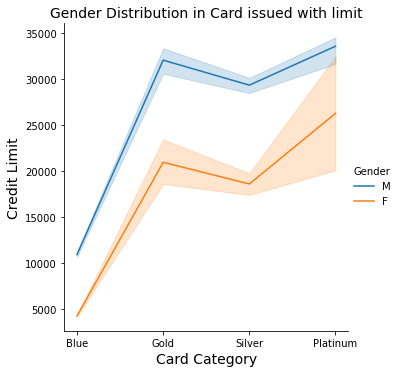

In [402]:
#Using seaborn relplot to check the distribution
sns.relplot(data=df_bank,x="Card_Category", y="Credit_Limit",hue="Gender",kind="line")

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Card Category', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Credit Limit', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Gender Distribution in Card issued with limit', size=14)

plt.show()

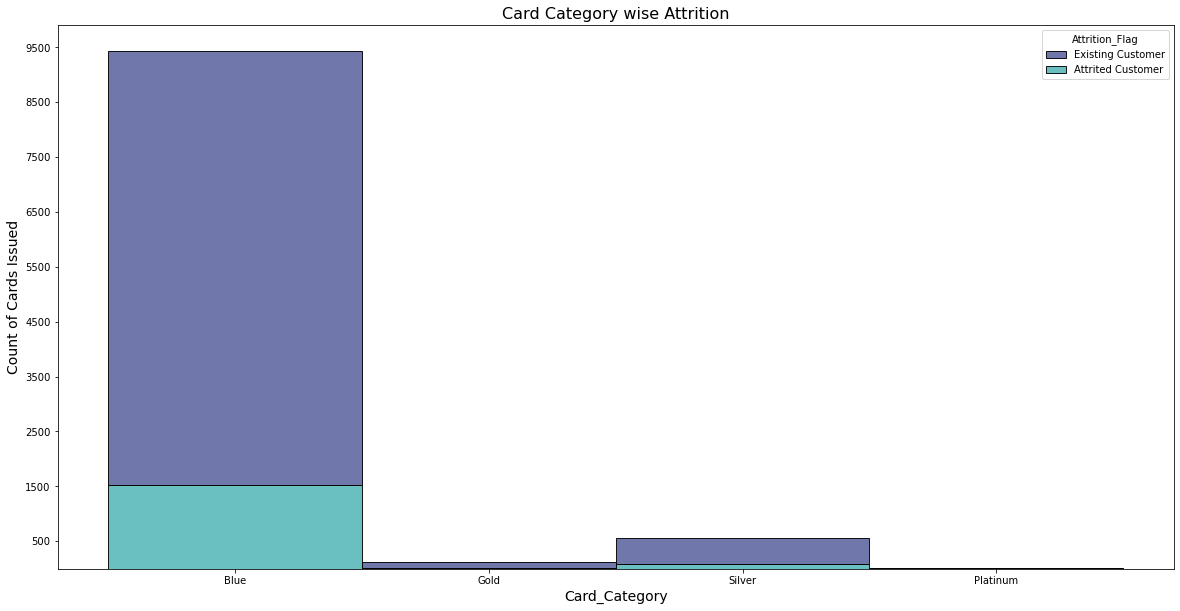

In [388]:
# As distribution ratio of some cards are at lower side hence creating a custom figure size of 20 X 10 inches for better visuals
figure = plt.figure(figsize=[20,10])

#Using seaborn histplot to check the distribution
sns.histplot(df_bank,x="Card_Category", hue="Attrition_Flag",multiple="stack",palette="mako",linewidth=.9)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Card_Category', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Count of Cards Issued', size=14)

plt.yticks(ticks=np.arange(500,10500,1000))

# Labelling title with a custom label and size of 16
plt.title(label='Card Category wise Attrition', size=16)

plt.show()

#### Observations:

Since Blue cards were issued maximum we can notice the highest attrition in Blue cards followed by Silver card.

Gold and Platinum card has the resistance and registered null or lowest attrition.


### Which card category of customer stays long on Months on book

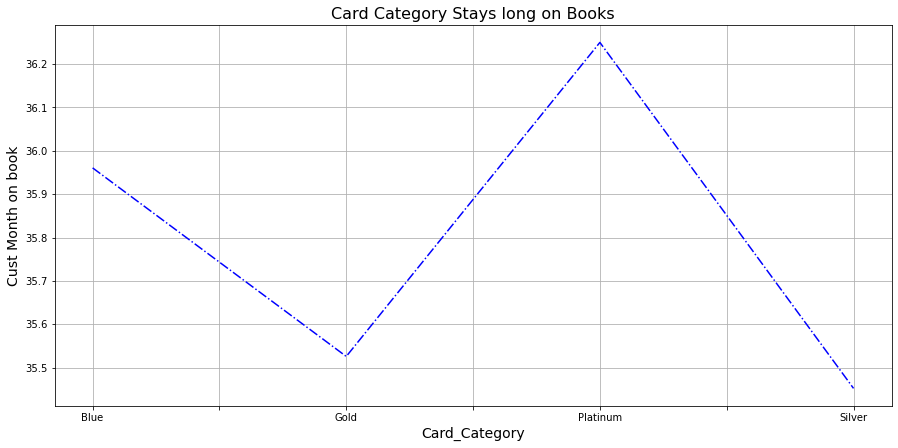

In [201]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of pandas line() function
df_bank.groupby(by = 'Card_Category')['Months_on_book'].mean().plot.line(color='blue', linestyle='-.')

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Card_Category', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Cust Month on book', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Card Category Stays long on Books', size=16)

# Enable the grid view in background
plt.grid(b=True)

plt.show()

#### Observations:

Platium being the most premium card stays long on the books, though the data for platium customers are limited hence bank should focus sourcing the platinum cards.

Gold and Silver category card customers are not staying long on the books month on month.

## Mulitivariate Analysis

Describe a type of data which consists of observations on more than two characteristics or attribute.

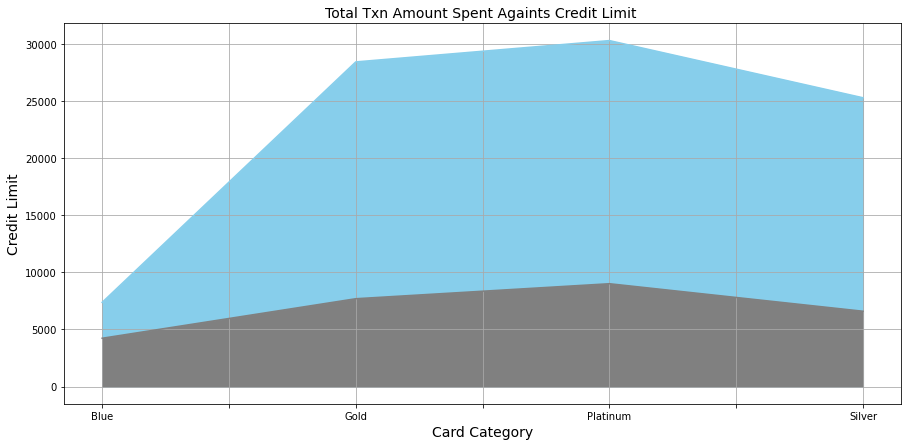

In [441]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using Group by method for Bivariate Analysis
df_bank.groupby(by = 'Card_Category')['Credit_Limit'].mean().plot.area(color = 'SkyBlue')
df_bank.groupby(by = 'Card_Category')['Total_Trans_Amt'].mean().plot.area(color = 'Grey')

# Labelling title with a custom label and size of 14
plt.title(label= 'Total Txn Amount Spent Againts Credit Limit ', size = 14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Credit Limit', size = 14)

# Labelling y-axis with a custom label and size of 14
plt.xlabel(xlabel='Card Category', size = 14)

# Enabling grid for better precision view
plt.grid(b=True, color='Darkgrey')

plt.show()

#### Observation:

We can notice that Female customer has the lowest credit limt as compared to credit limit alloted to Male customers.


### Which card category has the maximum open to buy limit post total revolving balance against the credit limit alloted.

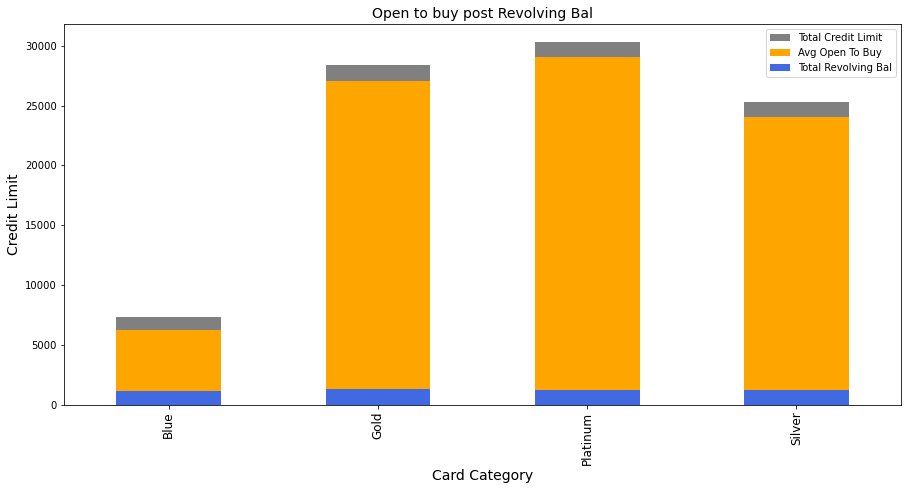

In [421]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of pandas bar() function for plotting stack bar plot
df_bank.groupby(by=['Card_Category'])['Credit_Limit'].mean().plot.bar(color='Grey')
df_bank.groupby(by=['Card_Category'])['Avg_Open_To_Buy'].mean().plot.bar(color='Orange')
df_bank.groupby(by=['Card_Category'])['Total_Revolving_Bal'].mean().plot.bar(color='RoyalBlue')

# Changing x-ticks label size to 12 and rotating to 90 degrees
plt.xticks(size=12, rotation=90)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Card Category', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Credit Limit', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Open to buy post Revolving Bal', size=14)

# Setting up legend for the fat types
plt.legend(labels=('Total Credit Limit', 'Avg Open To Buy', 'Total Revolving Bal'))

plt.show()

#### Observation:

Here we can see equal proportion in Revolving balance and Average open to buy against the credit limit issued accross all credit card categories.

### What is the ratio of Dependent Count & Marital Status in attrited customers


<Figure size 1080x504 with 0 Axes>

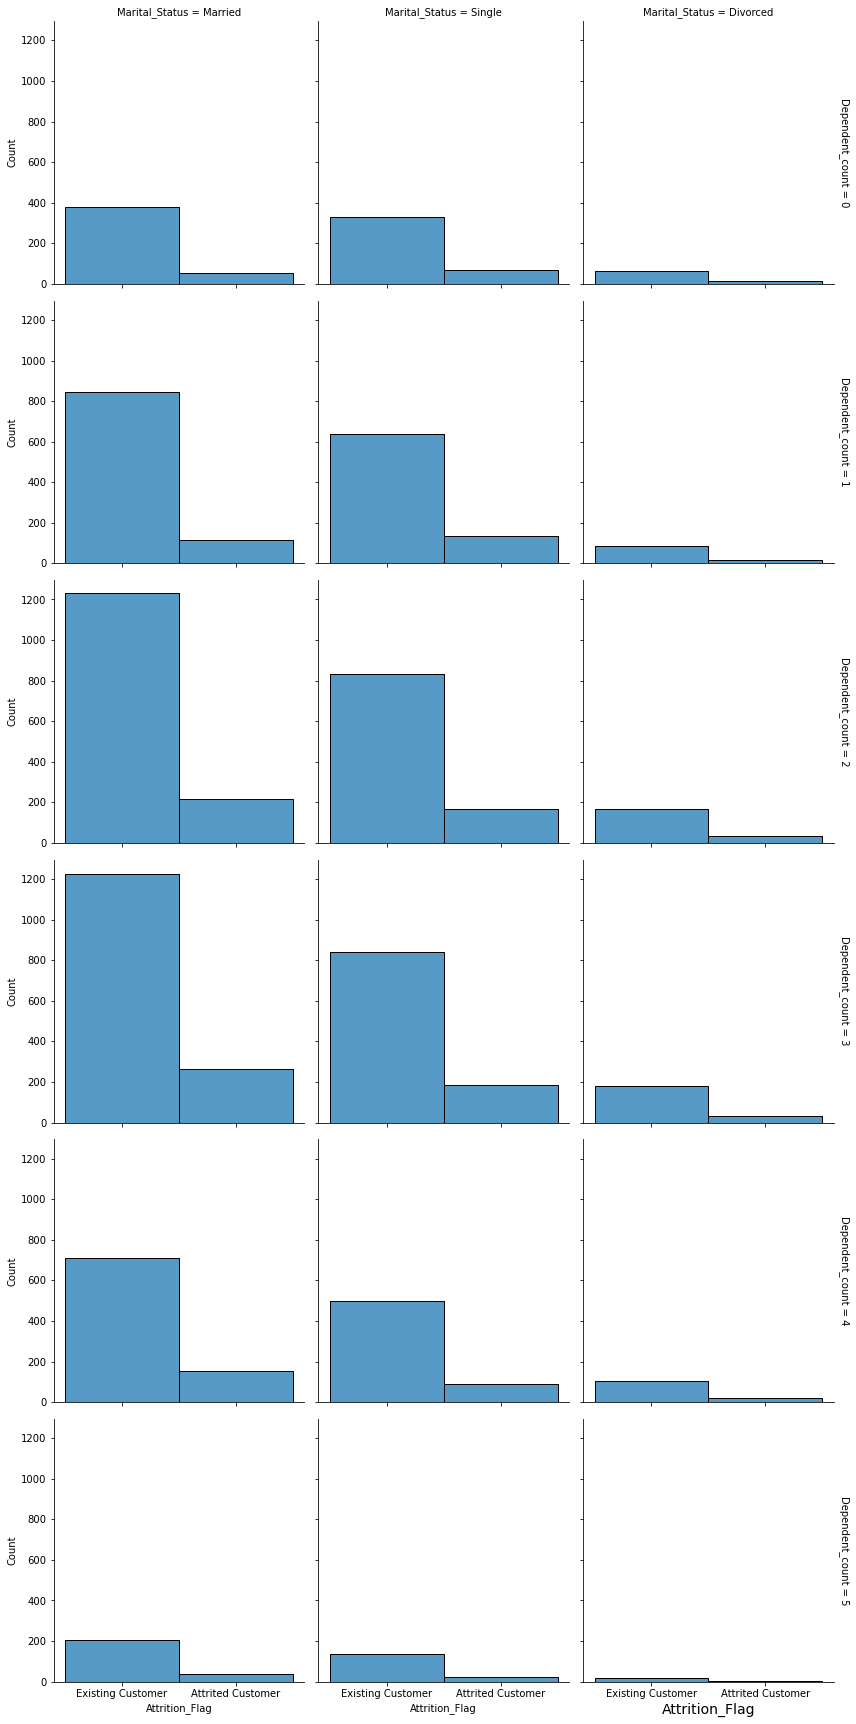

In [428]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

#Using displot relplot to check the distribution
sns.displot(df_bank, x="Attrition_Flag", col="Marital_Status", row="Dependent_count", height=4,
            facet_kws=dict(margin_titles=True),)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Attrition_Flag', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='No. Of Card Issued', size=14)

plt.show()

#### Observation:

From the above date we have observed with to proportion to #of cards issued. 

That,when Married Customer having 2, 3 & 4 dependents Attrition ratio is on higher side, however lowest ratio noticed when dependents are 0, 1 & 5.

When Single Customer having 0, 4 & 5 dependents Attrition ratio is on higher side, whereas lowest ratio registered when dependents are 1, 2 & 3.

Divorced customer having the lowest Attrition ratio as compared to Single & Married customer. However little spike noticed when there are 2 & 3 dependents on Divorced Customer.


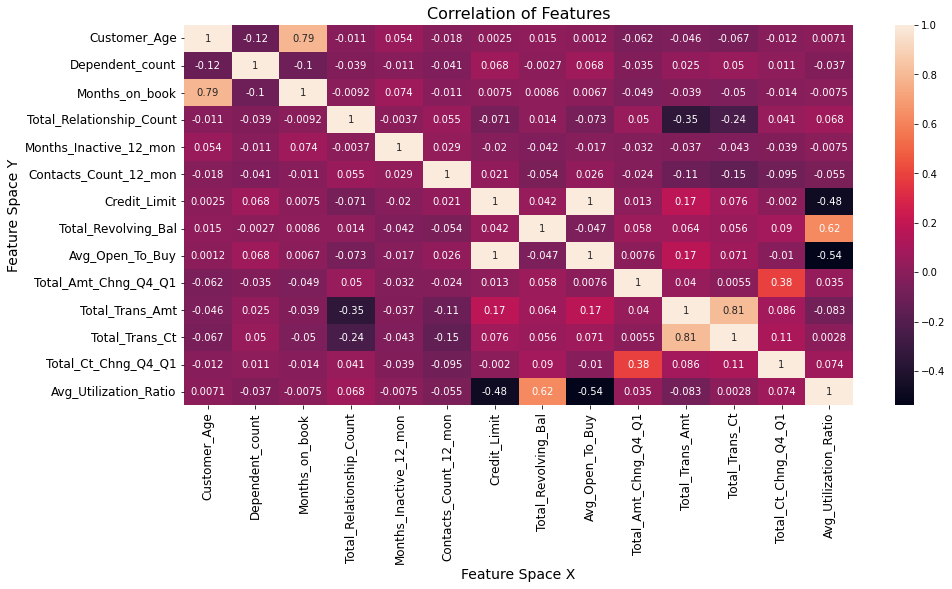

In [437]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of seaborn's heatmap() function
sns.heatmap(data=df_bank.corr(), annot=True, cmap='rocket')

# Changing x-ticks label size to 12
plt.xticks(size=12, rotation=90)

# Changing y-ticks label size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Feature Space X', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Feature Space Y', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Correlation of Features', size=16)

plt.show()

#### Observations:
 The diagonal cells of above matrix shows the auto-correlation of variable which is always equal to 1.

 Correlation varies from -1 to +1 and its interpretation works as follows:
   Value close to -1 refers to strong negative correlation.

   Value close to +1 refers to strong positive correlation.
  
   Value close to 0 referst to weak correlation.

 Variables with strong correlation are selected as the most probable candidates for model builing.

 Heatmaps are better suited to display a more generalised view of numerical data.

 The reason is their reliance on colour to communicate values is very clear.

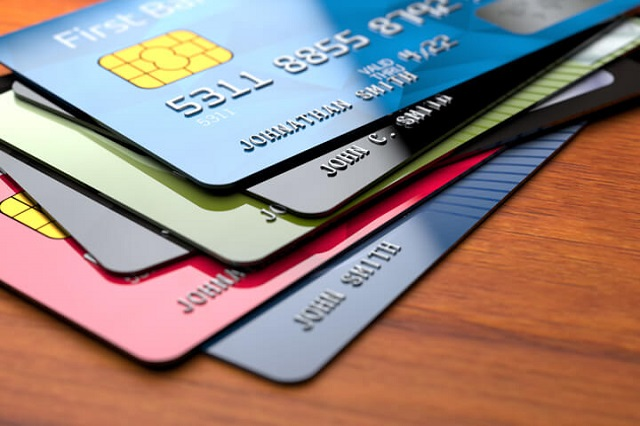

# Summarization


### 9.1 Conclusion


This Dataset reprensents the catogorization of the customers basis their Income, Marital Status, Dependent family members, Education and financial behaviours basis Credit Card Transactions.

Bank concerned about attrition of the existing customer which is currently at 16.1%.

Male customers has the highest credit limits alloted, though gender distribution ratio is almost equal.

Blue card has been sourced most which happened to be most attrited card category.

Salary range Less than $40K has the maximum card issued hence highest attrition percentage in this income category.

Gold & Silver card customers are not staying long on month on books, i.e they are doing less transactions.

Dependent counts having major impact on attrition of cards holding by Married & Single customers.


### 9.2 Actionable Insights

Credit card industry is very Competitive & Dynamic, unlike Banks there are several other service providers like Fintechs & NBFC offerings better credit card products & services with many add on features and lucritive reward srtucture.

Besides the competitive joining & annual fees Credit Card customer always keen to have better offerings on the cards, hence its very important to surprise customers with fancy Cashbacks, Rewardpoints, Giftvouchers, EMI facilities and other offers to have them long on book and keep doing transactions and getting rewarded.   

In this study there are some critical checkpoints which bank needs to workupon to reduce the attrition ratio.

Since Gender distribution is almost same, alloting equal or higher credit limits to Female customers should be considered to reduce the attrition.

In our bivariate analysis we have noticed less than $40K salary range customer issued with Gold and Silver card, hence bank should adopt proper product mix strategy to have structural card issuance basis income slabs to avoid attrition.

Bank should focus on upselling the highe variant cards like Platinum & Silver to higher salary range $ 120k + and $ 80k - $ 120k customers, as in study we have find blue cards issued to these set of customers which is wrong sourcing.

Bank must also focus on getting incremental Premium customers onboards to issue Platinum & Silver cards.

Blue & Silver cards spending should be encouraged by offering them higer Credit Limt enhancement offerings, which would definately reduce churining of customers.

Platium card's Average Utilization Rate has to be increased by encouraging them to do retail transactions, in our study we noticed they have higher limit, higher spend however utlization ratio on lower side becasue they are not doing retail transactions.

Dependent count of the card holder plays the significant role in card attrition, this cant be bypass by the bank though its not in their control. Bank should work upon on this factor while sourcing the cards. 


**<center><h3>Thank You!</h3></center>**